<a href="https://colab.research.google.com/github/truongkhanhduy95/MIT-Deep-Learning/blob/master/deep_learning_basics/deep_learning_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Basics

This tutorial accompanies the [lecture on Deep Learning Basics](https://www.youtube.com/watch?list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf&v=O5xeyoRL95U) given as part of [MIT Deep Learning](https://deeplearning.mit.edu). Acknowledgement to amazing people involved is provided throughout the tutorial and at the end. You can watch the video on YouTube:

[![Deep Learning Basics](https://i.imgur.com/FfQVV8q.png)](https://www.youtube.com/watch?list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf&v=O5xeyoRL95U)

In this tutorial, we mention seven important types/concepts/approaches in deep learning, introducing the first 2 and providing pointers to tutorials on the others. Here is a visual representation of the seven:

![Deep learning concepts](https://i.imgur.com/EAl47rp.png)

At a high-level, neural networks are either encoders, decoders, or a combination of both. Encoders find patterns in raw data to form compact, useful representations. Decoders generate new data or high-resolution useful infomation from those representations. As the lecture describes, deep learning discovers ways to **represent** the world so that we can reason about it. The rest is clever methods that help use deal effectively with visual information, language, sound (#1-6) and even act in a world based on this information and occasional rewards (#7).

1. **Feed Forward Neural Networks (FFNNs)** - classification and regression based on features. See [Part 1](#Part-1:-Boston-Housing-Price-Prediction-with-Feed-Forward-Neural-Networks) of this tutorial for an example.
2. **Convolutional Neural Networks (CNNs)** - image classification, object detection, video action recognition, etc. See [Part 2](#Part-2:-Classification-of-MNIST-Dreams-with-Convolution-Neural-Networks) of this tutorial for an example.
3. **Recurrent Neural Networks (RNNs)** - language modeling, speech recognition/generation, etc. See [this TF tutorial on text generation](https://www.tensorflow.org/tutorials/sequences/text_generation) for an example.
4. **Encoder Decoder Architectures** - semantic segmentation, machine translation, etc. See [our tutorial on semantic segmentation](https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_driving_scene_segmentation/tutorial_driving_scene_segmentation.ipynb) for an example.
5. **Autoencoder** - unsupervised embeddings, denoising, etc.
6. **Generative Adversarial Networks (GANs)** - unsupervised generation of realistic images, etc. See [this TF tutorial on DCGANs](https://github.com/tensorflow/tensorflow/blob/r1.11/tensorflow/contrib/eager/python/examples/generative_examples/dcgan.ipynb) for an example.
7. **Deep Reinforcement Learning** - game playing, robotics in simulation, self-play, neural arhitecture search, etc. We'll be releasing notebooks on this soon and will link them here.

There are selective omissions and simplifications throughout these tutorials, hopefully without losing the essence of the underlying ideas. See Einstein quote...



## Part 0: Prerequisites:

We recommend that you run this this notebook in the cloud on Google Colab (see link with icon at the top) if you're not already doing so. It's the simplest way to get started. You can also [install TensorFlow locally](https://www.tensorflow.org/install/). But, again, simple is best (with caveats):

![Einstein](https://i.imgur.com/vfPDHGN.png)

[tf.keras](https://www.tensorflow.org/guide/keras) is the simplest way to build and train neural network models in TensorFlow. So, that's what we'll stick with in this tutorial, unless the models neccessitate a lower-level API.

Note that there's [tf.keras](https://www.tensorflow.org/guide/keras) (comes with TensorFlow) and there's [Keras](https://keras.io/) (standalone). You should be using [tf.keras](https://www.tensorflow.org/guide/keras) because (1) it comes with TensorFlow so you don't need to install anything extra and (2) it comes with powerful TensorFlow-specific features.

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython

# Scikit-learn 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

print(tf.__version__)

1.12.0


## Part 1: Boston Housing Price Prediction with Feed Forward Neural Networks

Let's start with using a fully-connected neural network to do predict housing prices. The following image highlights the difference between regression and classification (see part 2). Given an observation as input, **regression** outputs a continuous value (e.g., exact temperature) and classificaiton outputs a class/category that the observation belongs to.

<img src="https://i.imgur.com/vvSoAzg.jpg" alt="classification_regression" width="400"/>

For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes these 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)."

Now, we load the dataset. Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

#Zscore normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. First we stack a few layers together using `keras.Sequential`. Next we configure the loss function, optimizer, and metrics to monitor. These are added during the model's compile step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps.

Let's build a network with 1 hidden layer of 20 neurons, and use mean squared error (MSE) as the loss function (most common one for regression problems):

In [0]:
def build_model():
  model = keras.Sequential([
      keras.layers.Dense(20, activation=tf.nn.relu, input_shape=[len(X_train[0])]),
      keras.layers.Dense(1)
  ])
  
  model.compile(optimizer = tf.train.AdamOptimizer(),
               loss = 'mse',
               metrics = ['mae','mse'])
  return model

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_features` and `train_labels` arrays.
2. The model learns to associate features and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_features` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [0]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(X_train, y_train, epochs=1000, verbose=0, validation_split = 0.1, callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Show RMSE measure
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.............................
Final Root Mean Square Error on validation set: 2.392


Now, let's plot the loss function measure on the training and validation sets. The validation set is used to prevent overfitting ([learn more about it here](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)). However, because our network is small, the training convergence without noticeably overfitting the data as the plot shows.

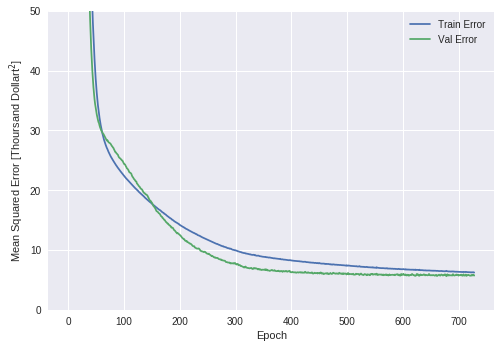

In [0]:
def plot_history(hist):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [Thoursand Dollart$^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='Val Error')
  plt.legend()
  plt.ylim([0,50])
  
plot_history(hist)

Next, compare how the model performs on the test dataset:

In [0]:
X_test = scaler.transform(X_test)

mse, _, _ = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

102/102 [==============================] - 0s 146us/step
Root Mean Square Error on test set: 4.17


## Part 2: Classification of MNIST Dreams with Convolutional Neural Networks

Next, let's build a convolutional neural network (CNN) classifier to classify images of handwritten digits in the MNIST dataset with a twist where we test our classifier on high-resolution hand-written digits from outside the dataset.

The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [0]:
def preprocess_images(imgs): # should work for both single and multiple images
  sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
  assert sample_img.shape == (28,28), sample_img.shape # make sure images are 28x28
  return imgs / 255.0

X_train = preprocess_images(X_train)
X_test = preprocess_images(X_test)

Display the first 5 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

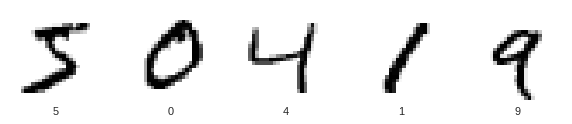

In [6]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [0]:
def build_model():
  model = keras.Sequential([
      keras.layers.Flatten(input_shape(28, 28)), # flatten image to a 1d-array
      keras.layers.Dense(128, activation=tf.nn.relu), # fully connected layer (128 nodes)
      keras.layers.Dense(10, activation=tf.nn.softmax) # softmax layer returns an array of 10 probability scores that sum to 1
  return model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 98.6% on the training data.